In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score,classification_report

In [3]:
x = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = LogisticRegression()

In [16]:
model.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(x_test)
print("Predictions:",y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Predictions: [1 0]
Accuracy: 1.0


In [18]:
print("\n Classification report:\n",classification_report(y_test,y_pred))


 Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



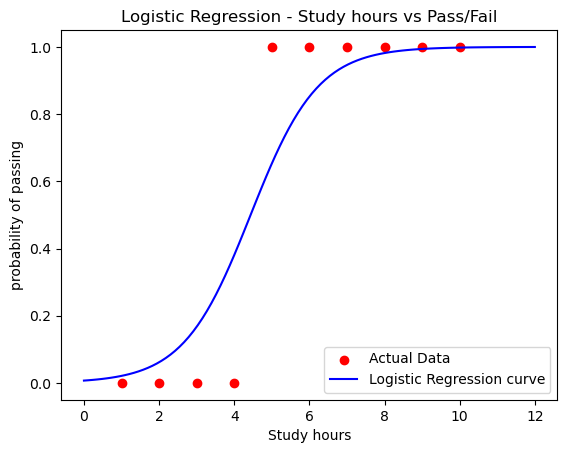

In [19]:
x_range = np.linspace(0,12,100).reshape(-1,1)
y_prob = model.predict_proba(x_range)[:,1]

plt.scatter(x,y,color ='red',label="Actual Data")
plt.plot(x_range,y_prob,color = 'blue',label="Logistic Regression curve")
plt.xlabel("Study hours")
plt.ylabel("probability of passing")
plt.title("Logistic Regression - Study hours vs Pass/Fail")
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)


[[1 0]
 [0 1]]


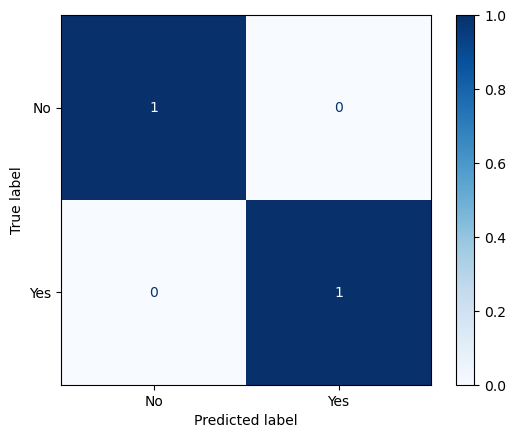

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap="Blues",
    values_format="d",
    display_labels=["No", "Yes"]
)


In [24]:
import pandas as pd
df = pd.read_csv("heart.csv")

In [25]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [28]:
x = df.drop("target",axis=1)
y = df["target"]

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = LogisticRegression()

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [54]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [55]:
y_pred = model.predict(x_test)
print(y_pred)

[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0]


In [56]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.7951219512195122


In [57]:
print("\n Classification report:\n",classification_report(y_test,y_pred))


 Classification report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [58]:
print(confusion_matrix(y_test,y_pred))

[[73 29]
 [13 90]]
